In [5]:
import yfinance as yf
from vnstock import Vnstock
import pandas as pd
from stockstats import StockDataFrame as Sdf
import matplotlib.pyplot as plt

## 1. Get Index Info

In [46]:
def convert_sector(sec_list):
    new_sec_dict = {'Information technology': 'IT',
                    'Telecommunications industry': 'IT',
                    'Other Products': 'IT',
                    'Information & Communication': 'IT',
                    'Technology services': 'IT',
                    'Biopharmaceutical': 'Pharmaceutical',
                    'Pharmaceutical': 'Pharmaceutical',
                    'Pharmaceutical industry': 'Pharmaceutical',
                    'Retailing': 'Retailing',
                    'Retail Trade': 'Retailing',
                    'Retail trade': 'Retailing',
                    'Financial services': 'Finance&Banking',
                    'Banks': 'Finance&Banking',
                    'Finance': 'Finance&Banking',
                    'Aerospace and defense': 'Aerospace',
                    'Construction and mining': 'Construction',
                    'Consumer durables': 'Construction',
                    'Petroleum industry': 'Power',
                    'Utilities': 'Power',
                    'Distribution services': 'Power',
                    'Broadcasting and entertainment': 'Communication',
                    'Home Improvement': 'Consumer Goods',
                    'Fast-moving consumer goods': 'Consumer Goods',
                    'Conglomerate': 'Conglomerate',
                    'Drink industry': 'F&B Producers',
                    'Food industry': 'F&B Producers',
                    'Foods': 'F&B Producers',
                    'Consumer non-durables': 'F&B Producers',
                    'Clothing industry': 'Clothing',
                    'Specialty chemicals': 'Chemicals',
                    'Chemicals': 'Chemicals',
                    'Insurance': 'Insurance',
                    'Managed health care': 'Insurance',
                    'Services': 'Services',
                    'Machinery': 'Machinery',
                    'Non-energy minerals': 'Machinery',
                    'Transportation Equipment': 'Automobiles',
                    'Electric Appliances': 'Appliances',
                    'Precision Instruments': 'Healthcare',
                    'Wholesale Trade': 'Wholesale',
                    'Process industries': 'Materials',
                    'Transportation': 'Transportation'
                    }

    new_sec_list = [new_sec_dict[s] for s in sec_list]

    return new_sec_list


def plot_sector_distr(market, df):
    sectors = df['Sector'].unique()
    sector_distr = {f'{sec}': len(df[df['Sector']==sec]) for sec in sectors}
    plt.figure(figsize=(8, 6))
    plt.pie(x=list(sector_distr.values()),
            labels=list(sector_distr.keys()),
            autopct=lambda pct: '{:d}'.format(int(round(pct*30/100))),
            pctdistance=0.7,
            labeldistance=1.1,
            textprops={'size': 'x-large'})
    
    plt.savefig(f'figures/{market}/{market}_sectors.pdf', bbox_inches='tight')
    plt.show()

### 1.1 US: Dow Jones 30 Index

In [13]:
dj30 = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[2]
dj30 = dj30[['Company', 'Symbol', 'Industry']].sort_values(by='Symbol')
dj30_sectors = list(dj30['Industry'].values)
dj30['Sector'] = convert_sector(dj30_sectors)
dj30.drop(columns='Industry', inplace=True)
dj30.rename(columns={'Symbol': 'Ticker'}, inplace=True)
dj30.reset_index(drop=True, inplace=True)
dj30.to_csv('data/DowJones30Index_info.csv')
dj30

,Company,Ticker,Sector
0,Apple,AAPL,IT
1,Amgen,AMGN,Pharmaceutical
2,Amazon,AMZN,Retailing
3,American Express,AXP,Finance&Banking
4,Boeing,BA,Aerospace
5,Caterpillar,CAT,Construction
6,Salesforce,CRM,IT
7,Cisco,CSCO,IT
8,Chevron,CVX,Power
9,Disney,DIS,Communication


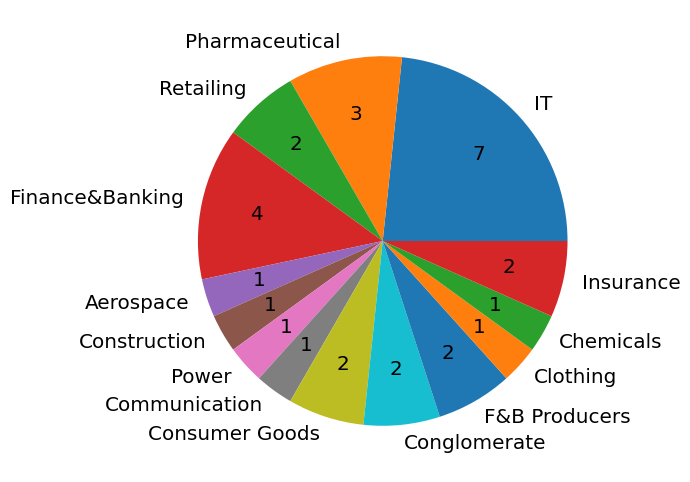

In [22]:
plot_sector_distr(market='US', df=dj30)

### 1.2. Japan: TOPIX 30 Index

In [15]:
def modify_name(name_list):
    suffices = [' INC.', ' Holdings Co.,Ltd.', ' Co.,Ltd.', ' & CO.,LTD.', ' CO.,LTD.', ' Company Limited', ' COMPANY,LIMITED', ',LTD.', ',Ltd.', ' Corporation',
                ' GROUP CORPORATION', ' CORPORATION', ' Corp.', ' Industries,Ltd.', ' Limited', ' Financial Group,Inc.', ' Holdings,Inc.']
    
    new_names = []
    for name in name_list:
        for suf in suffices:
            if suf in name:
                name = name.replace(suf, '')
                new_names.append(name)
                break
    
    return new_names

In [16]:
# https://www.jpx.co.jp/english/markets/indices/topix/
to30 = pd.read_csv('data/topixweight_e.csv', encoding='unicode_escape')
to30 = to30[to30['New Index Series Code']=='TOPIX Core30']
to30 = to30[['Issue', 'Code', 'Sector']]
to30[to30['Code']=='9434'] = ['NTT DATA GROUP CORPORATION', '9613', 'Information & Communication']
to30.sort_values(by='Code', inplace=True)
to30_companies = list(to30['Issue'].values)
to30['Issue'] = modify_name(to30_companies)
to30.loc[to30['Code']=='9432', 'Issue'] = 'NTT'
to30_sectors = list(to30['Sector'].values)
to30['Sector'] = convert_sector(to30_sectors)
to30['Code'] = [f'{s}.T' for s in to30['Code'].sort_values().values]
to30.rename(columns={'Issue': 'Company', 'Code': 'Ticker'}, inplace=True)
to30.reset_index(drop=True, inplace=True)
to30.to_csv('data/TOPIX30Index_info.csv')
to30

,Company,Ticker,Sector
0,JAPAN TOBACCO,2914.T,F&B Producers
1,Seven & i,3382.T,Retailing
2,Shin-Etsu Chemical,4063.T,Chemicals
3,Takeda Pharmaceutical,4502.T,Pharmaceutical
4,DAIICHI SANKYO,4568.T,Pharmaceutical
5,Recruit,6098.T,Services
6,DAIKIN INDUSTRIES,6367.T,Machinery
7,Hitachi,6501.T,Appliances
8,Mitsubishi Electric,6503.T,Appliances
9,SONY,6758.T,Appliances


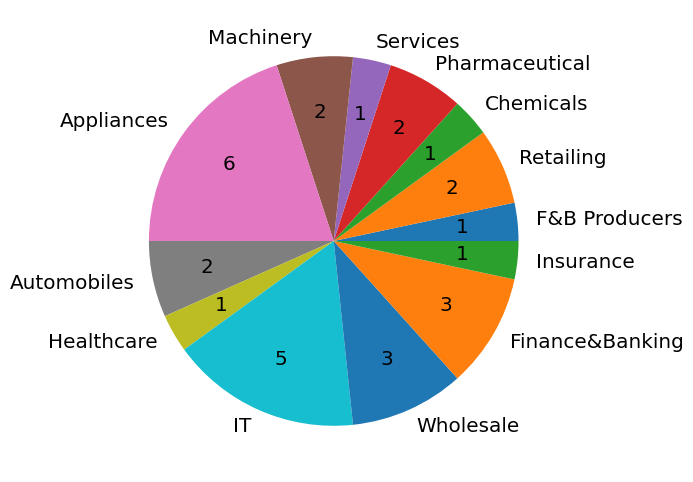

In [23]:
plot_sector_distr(market='JP', df=to30)

### 1.3. Vietnam: VN30 Index

In [44]:
def shorten_name(ticker_list):
    short_name_dict = {'ACB': 'Asia Commercial Bank',
                       'AGR': 'Agribank',
                       'BCM': 'Becamex',
                       'BID': 'BIDV',
                       'BVH': 'Bao Viet',
                       'CTG': 'Vietinbank',
                       'FPT': 'FPT',
                       'GAS': 'PetroVietNam Gas',
                       'GVR': 'Vietnam Rubber Group',
                       'HDB': 'HDBank',
                       'HPG': 'Hoa Phat',
                       'LPB': 'LPBank',
                       'MBB': 'MBBank',
                       'MSN': 'Masan',
                       'MWG': 'Mobile World',
                       'PLX': 'Petrolimex',
                       'SAB': 'Saigon Beer',
                       'SHB': 'Saigon-Hanoi Bank',
                       'SSB': 'SeABank',
                       'SSI': 'Saigon Securities',
                       'STB': 'Sacombank',
                       'TCB': 'Techcombank',
                       'TPB': 'TPBank',
                       'VCB': 'Vietcombank',
                       'VHM': 'Vinhomes',
                       'VIB': 'Vietnam International Bank',
                       'VIC': 'Vingroup',
                       'VJC': 'Vietjet',
                       'VNM': 'Vinamilk',
                       'VPB': 'VPBank',
                       'VRE': 'Vincom'}
    
    new_name_list = [short_name_dict[tic] for tic in ticker_list]

    return new_name_list

In [51]:
vn30 = pd.read_html('https://www.tradingview.com/symbols/HOSE-VN30/components/')[0]
vn30 = vn30[['Symbol', 'Sector']]
vn30['Symbol'] = [s[:3] for s in vn30['Symbol']]
vn30[vn30['Symbol']=='SSB'] = ['AGR', 'Finance']
vn30.sort_values(by='Symbol', inplace=True)
vn30['Company'] = shorten_name(list(vn30['Symbol'].values))
vn30_sectors = list(vn30['Sector'].values)
vn30['Sector'] = convert_sector(vn30_sectors)
vn30.loc[vn30['Symbol'].isin(['BCM', 'VHM']), 'Sector'] = 'Real Estate'
vn30.rename(columns={'Symbol': 'Ticker'}, inplace=True)
vn30 = vn30[['Company', 'Ticker', 'Sector']]
vn30.reset_index(drop=True, inplace=True)
vn30.to_csv('data/VN30Index_info.csv')
vn30

,Company,Ticker,Sector
0,Asia Commercial Bank,ACB,Finance&Banking
1,Agribank,AGR,Finance&Banking
2,Becamex,BCM,Real Estate
3,BIDV,BID,Finance&Banking
4,Bao Viet,BVH,Finance&Banking
5,Vietinbank,CTG,Finance&Banking
6,FPT,FPT,IT
7,PetroVietNam Gas,GAS,Power
8,Vietnam Rubber Group,GVR,Materials
9,HDBank,HDB,Finance&Banking


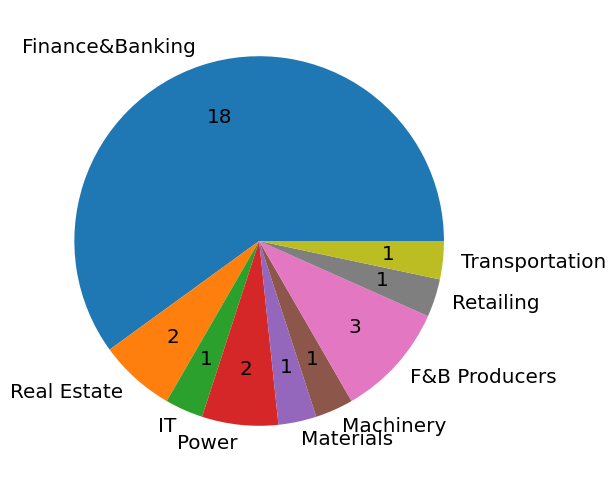

In [58]:
plot_sector_distr(market='VN', df=vn30)

### 1.4. Vietnam: Qualified Stocks published before 2015

In [64]:
def shorten_name_vn(ticker_list):
    short_name_dict = {'ACB': 'Asia Commercial Bank',
                       'AGR': 'Agribank',
                       'BCM': 'Becamex',
                       'BID': 'BIDV',
                       'BVH': 'Bao Viet',
                       'CTG': 'Vietinbank',
                       'FPT': 'FPT',
                       'GAS': 'PetroVietNam Gas',
                       'HPG': 'Hoa Phat',
                       'MBB': 'MBBank',
                       'MSN': 'Masan',
                       'MWG': 'Mobile World',
                       'SHB': 'Saigon-Hanoi Bank',
                       'SSB': 'SeABank',
                       'SSI': 'Saigon Securities',
                       'STB': 'Sacombank',
                       'VCB': 'Vietcombank',
                       'VHM': 'Vinhomes',
                       'VIC': 'Vingroup',
                       'VNM': 'Vinamilk',
                       'EIB': 'Eximbank',
                       'DGC': 'Duc Giang Chemicals',
                       'REE': 'Refrigeration EE Corp',
                       'VIX': 'VIX Securities',
                       'VND': 'VNDIRECT Securities',
                       'PNJ': 'Phu Nhuan Jewelry',
                       'KDH': 'Khang Dien Group',
                       'HCM': 'Ho Chi Minh Securities',
                       'KBC': 'Kinh Bac City Development',
                       'GMD': 'Gemadept Corporation',
                       'DXG': 'Dat Xanh Group',
                       'SBT': 'TTC Sugar'}
    
    new_name_list = [short_name_dict[tic] for tic in ticker_list]

    return new_name_list


def sector_vn(ticker_list):
    sector_dict = {'ACB': 'Finance&Banking',
                       'AGR': 'Finance&Banking',
                       'BCM': 'Real Estate',
                       'BID': 'Finance&Banking',
                       'BVH': 'Finance&Banking',
                       'CTG': 'Finance&Banking',
                       'FPT': 'IT',
                       'GAS': 'Power',
                       'HPG': 'Machinery',
                       'MBB': 'Finance&Banking',
                       'MSN': 'F&B Producers',
                       'MWG': 'Retailing',
                       'SHB': 'Finance&Banking',
                       'SSB': 'Finance&Banking',
                       'SSI': 'Finance&Banking',
                       'STB': 'Finance&Banking',
                       'VCB': 'Finance&Banking',
                       'VHM': 'Real Estate',
                       'VIC': 'Finance&Banking',
                       'VNM': 'F&B Producers',
                       'EIB': 'Finance&Banking',
                       'DGC': 'Chemicals',
                       'REE': 'Machinery',
                       'VIX': 'Finance&Banking',
                       'VND': 'Finance&Banking',
                       'PNJ': 'Jewelry',
                       'KDH': 'Real Estate',
                       'HCM': 'Finance&Banking',
                       'KBC': 'Real Estate',
                       'GMD': 'Transportation',
                       'DXG': 'Real Estate',
                       'SBT': 'F&B Producers'}
    
    sector_list = [sector_dict[tic] for tic in ticker_list]

    return sector_list

In [65]:
qualified_tickers = ['ACB', 'AGR', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'HPG', 'MBB', 'MSN',
                     'MWG', 'SHB', 'SSI', 'STB', 'VCB', 'VHM', 'VIC', 'VNM', 'EIB', 'DGC',
                     'REE', 'VIX', 'VND', 'PNJ', 'KDH', 'HCM', 'KBC', 'GMD', 'DXG', 'SBT']
vn30n = pd.DataFrame()
vn30n['Symbol'] = qualified_tickers
vn30n['Company'] = shorten_name_vn(qualified_tickers)
vn30n['Sector'] = sector_vn(qualified_tickers)
vn30n.sort_values(by='Symbol', inplace=True)
vn30n.rename(columns={'Symbol': 'Ticker'}, inplace=True)
vn30n.reset_index(drop=True, inplace=True)
vn30n.to_csv('data/VN30new_info.csv')
vn30n

,Ticker,Company,Sector
0,ACB,Asia Commercial Bank,Finance&Banking
1,AGR,Agribank,Finance&Banking
2,BID,BIDV,Finance&Banking
3,BVH,Bao Viet,Finance&Banking
4,CTG,Vietinbank,Finance&Banking
5,DGC,Duc Giang Chemicals,Chemicals
6,DXG,Dat Xanh Group,Real Estate
7,EIB,Eximbank,Finance&Banking
8,FPT,FPT,IT
9,GAS,PetroVietNam Gas,Power


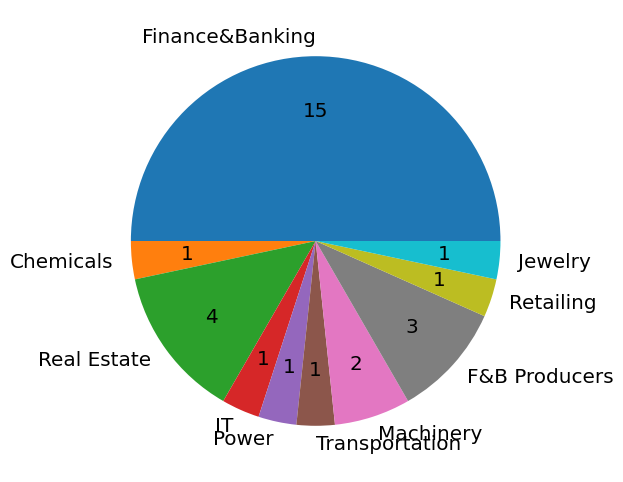

In [66]:
plot_sector_distr(market='VNn', df=vn30n)

## 2. Download and Preprocess Data

In [68]:
dj30 = pd.read_csv('data/DowJones30Index_info.csv')
to30 = pd.read_csv('data/TOPIX30Index_info.csv')
vn30 = pd.read_csv('data/VN30Index_info.csv')
vn30n = pd.read_csv('data/VN30new_info.csv')

tickers_market = {'US': list(dj30['Ticker'].values),
                  'JP': list(to30['Ticker'].values),
                  'VN': list(vn30['Ticker'].values),
                  'VNn': list(vn30n['Ticker'].values)}

In [82]:
def download_data_vn(market, start_date, end_date):
    tickers = tickers_market[market]
    aggragated_data = []
    for i, tic in enumerate(tickers):
        stock = Vnstock().stock(symbol=tic)
        data = stock.quote.history(start=start_date, end=end_date)
        if i < len(tickers)-1:
            data.drop(columns='time', inplace=True)
        aggragated_data.append(data)
    
    aggragated_data_df = pd.concat(aggragated_data, axis=1)
    new_cols = [tickers, ['Open' ,'High', 'Low', 'Adj Close', 'Volume']]
    aggragated_data_df.index = pd.to_datetime(aggragated_data_df['time'], format='%Y-%m-%d')
    aggragated_data_df.drop(columns='time', inplace=True)
    aggragated_data_df.index.name = 'Date'
    aggragated_data_df.columns = pd.MultiIndex.from_product(new_cols, names=['Ticker', 'Price'])

    return aggragated_data_df


def download_data(market, start_date, end_date):
    if market in['VN', 'VNn']:
        data = download_data_vn(market, start_date, end_date)
    else:
        data = yf.download(tickers=tickers_market[market],
                        start=start_date,
                        end=end_date,
                        auto_adjust=False,
                        group_by='ticker')
    
    return data


def rearrange_data(df, market):
    rearranged_data = []

    for tic in tickers_market[market]:
        tic_data_df = df[tic][['Adj Close', 'Open', 'High', 'Low', 'Volume']]
        tic_data_df['ticker'] = tic
        rearranged_data.append(tic_data_df)

    rearranged_data_df = pd.concat(rearranged_data)
    rearranged_data_df = rearranged_data_df.reset_index()
    rearranged_data_df.rename(columns={'Date': 'date',
                                       'Adj Close': 'adjcp',
                                       'Open': 'open',
                                       'High': 'high',
                                       'Low': 'low',
                                       'Volume': 'volume'},
                              inplace=True)
    rearranged_data_df = rearranged_data_df[['date', 'ticker', 'adjcp', 'open', 'high', 'low', 'volume']]
    rearranged_data_df = rearranged_data_df.sort_values(by=['date', 'ticker'])
    rearranged_data_df = rearranged_data_df.reset_index(drop=True)

    return rearranged_data_df


def add_technical_indicator(df, market):
    new_df = df.copy()
    stock = Sdf.retype(df.copy())
    stock['close'] = stock['adjcp']

    macd = []
    rsi = []
    cci = []
    dx = []

    for tic in tickers_market[market]:
        temp_macd = stock[stock['ticker']==tic]['macd']
        macd.append(temp_macd)
        temp_rsi = stock[stock['ticker']==tic].get('rsi_30')
        rsi.append(temp_rsi)
        temp_cci = stock[stock['ticker']==tic].get('cci_30')
        cci.append(temp_cci)
        temp_dx = stock[stock['ticker']==tic].get('dx_30')
        dx.append(temp_dx)

    macd = pd.concat(macd).sort_index()
    rsi = pd.concat(rsi).sort_index()
    cci = pd.concat(cci).sort_index()
    dx = pd.concat(dx).sort_index()

    new_df['macd'] = macd.values
    new_df['rsi'] = rsi.values
    new_df['cci'] = cci.values
    new_df['adx'] = dx.values
    new_df.bfill(inplace=True)
    
    return new_df


def create_final_data(market, start_date, end_date):
    raw_data = download_data(market=market, start_date=start_date, end_date=end_date)
    rearranged_data = rearrange_data(df=raw_data, market=market)
    final_data = add_technical_indicator(df=rearranged_data, market=market)

    return final_data

### 2.1 US: Dow Jones 30 Index

In [161]:
final_data_dj30 = create_final_data(market='US', start_date='2015-01-05', end_date='2025-03-31')
final_data_dj30.columns.name = 'USD'
final_data_dj30.to_csv('data/DowJones30Index_final.csv')
final_data_dj30

[*********************100%***********************]  30 of 30 completed


USD,date,ticker,adjcp,open,high,low,volume,macd,rsi,cci,adx
0,2015-01-05,AAPL,23.604332,27.072500,27.162500,26.352501,257142000,0.000000,0.000000,-66.666667,100.000000
1,2015-01-05,AMGN,116.813530,157.429993,159.600006,154.259995,4080300,0.000000,0.000000,-66.666667,100.000000
2,2015-01-05,AMZN,15.109500,15.350500,15.419000,15.042500,55484000,0.000000,0.000000,-66.666667,100.000000
3,2015-01-05,AXP,77.756500,92.459999,92.779999,90.320000,3469600,0.000000,0.000000,-66.666667,100.000000
4,2015-01-05,BA,112.870049,129.660004,129.919998,128.610001,5024800,0.000000,0.000000,-66.666667,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
77215,2025-03-28,TRV,261.790009,265.510010,266.309998,261.489990,1185400,-3.669985,44.635636,-60.321271,8.898046
77216,2025-03-28,UNH,516.039978,516.869995,520.979980,515.049988,2379100,3.442130,56.974744,93.635634,24.673511
77217,2025-03-28,V,342.281555,349.190002,351.619995,341.609985,5687600,5.170884,51.515071,97.500933,1.661622
77218,2025-03-28,VZ,44.219753,45.130001,45.340000,44.880001,19530600,-1.002974,49.912685,-103.656814,1.129280


### 2.2. Japan: TOPIX 30 Index

In [180]:
final_data_to30 = create_final_data(market='JP', start_date='2015-01-05', end_date='2025-03-31')
final_data_to30.columns.name = 'JPY'
final_data_to30.to_csv('data/TOPIX30Index_final.csv')
final_data_to30

[*********************100%***********************]  30 of 30 completed


JPY,date,ticker,adjcp,open,high,low,volume,macd,rsi,cci,adx
0,2015-01-05,2914.T,1919.940430,3288.500000,3295.000000,3226.000000,5627300.0,0.000000,0.000000,-66.666667,100.000000
1,2015-01-05,3382.T,1167.011719,1443.333374,1456.333374,1431.666626,6087300.0,0.000000,0.000000,-66.666667,100.000000
2,2015-01-05,4063.T,1312.988770,1566.800049,1595.400024,1561.400024,4520000.0,0.000000,0.000000,-66.666667,100.000000
3,2015-01-05,4502.T,3257.554443,4983.500000,5027.000000,4923.000000,1858000.0,0.000000,0.000000,-66.666667,100.000000
4,2015-01-05,4568.T,471.281891,558.666687,560.666687,552.333313,14561100.0,0.000000,0.000000,-66.666667,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
75655,2025-03-28,9432.T,146.600006,147.500000,147.899994,146.300003,181251800.0,214.588829,63.812462,122.092833,26.277735
75656,2025-03-28,9433.T,2442.500000,2438.500000,2442.500000,2387.000000,7566500.0,0.113848,49.471773,15.574296,14.024257
75657,2025-03-28,9434.T,212.100006,211.500000,212.500000,208.899994,85659400.0,-7.458409,52.840206,-0.624332,11.199852
75658,2025-03-28,9983.T,45740.000000,46440.000000,46440.000000,45250.000000,1390000.0,6.202154,47.586720,-84.782479,2.653637


### 2.3. Vietnam: VN30 Index

In [160]:
final_data_vn30 = create_final_data(market='VN', start_date='2018-07-02', end_date='2025-03-31')
final_data_vn30.columns.name = 'VND (000s)'
final_data_vn30.to_csv('data/VN30Index_final.csv')
final_data_vn30

VND (000s),date,ticker,adjcp,open,high,low,volume,macd,rsi,cci,adx
0,2018-07-02,ACB,6.43,6.87,6.87,6.33,6858520.0,0.000000,0.000000,-66.666667,100.000000
1,2018-07-02,AGR,3.11,3.11,3.12,3.06,45020.0,0.000000,0.000000,-66.666667,100.000000
2,2018-07-02,BCM,17.83,17.83,17.83,17.83,100.0,0.000000,0.000000,-66.666667,100.000000
3,2018-07-02,BID,13.66,14.07,14.35,13.44,3542250.0,0.000000,0.000000,-66.666667,100.000000
4,2018-07-02,BVH,65.19,67.06,70.19,64.35,128870.0,0.000000,0.000000,-66.666667,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
50605,2025-03-31,VIC,58.00,57.80,58.50,57.30,6654000.0,-0.157237,45.902389,120.045068,11.080777
50606,2025-03-31,VJC,95.00,95.90,95.90,94.70,524800.0,4.038610,86.630697,120.045068,60.646184
50607,2025-03-31,VNM,58.53,58.72,59.49,58.53,5308209.0,-0.413602,38.714407,-197.782362,23.656456
50608,2025-03-31,VPB,18.50,18.64,18.74,18.50,14768166.0,-0.072691,44.392790,-82.252878,2.737455


### 2.4. Vietnam: Qualified Stocks published before 2015

In [83]:
final_data_vn30n = create_final_data(market='VNn', start_date='2015-01-05', end_date='2025-03-31')
final_data_vn30n.columns.name = 'VND (000s)'
final_data_vn30n.to_csv('data/VN30new_final.csv')
final_data_vn30n

VND (000s),date,ticker,adjcp,open,high,low,volume,macd,rsi,cci,adx
0,2015-01-05,ACB,2.34,2.35,2.35,2.32,55888.0,0.000000,100.000000,66.666667,100.000000
1,2015-01-05,AGR,5.35,5.26,5.35,5.26,93170.0,0.000000,100.000000,66.666667,100.000000
2,2015-01-05,BID,5.91,5.91,5.96,5.91,66380.0,0.000000,100.000000,66.666667,100.000000
3,2015-01-05,BVH,26.55,25.59,26.94,25.59,984900.0,0.000000,100.000000,66.666667,100.000000
4,2015-01-05,CTG,8.17,8.12,8.23,8.12,60490.0,0.000000,100.000000,66.666667,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
76705,2025-03-31,VHM,58.00,57.80,58.50,57.30,6654000.0,0.663964,51.778060,6.161769,14.859633
76706,2025-03-31,VIC,58.00,57.80,58.50,57.30,6654000.0,2.588240,78.112210,120.045068,48.772597
76707,2025-03-31,VIX,58.53,58.72,59.49,58.53,5308209.0,4.038610,86.630697,120.045068,60.646184
76708,2025-03-31,VND,58.53,58.72,59.49,58.53,5308209.0,0.087707,56.988075,166.020672,28.065928
